In [12]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle
import scipy
from scipy.interpolate import interp1d
import skimage
from skimage import io, exposure, filters
import correlation_functions
from correlation_functions import autocorrelation_2D, autocorrelation_1D, find_where_corr_at_half

from numpy.fft import fftshift, fft2, ifft2, fft, ifft
from numpy import real
from numpy import conj

%matplotlib notebook


In [59]:
all_data = {}

Set the directory for where the data is below.

Here, we are reading in *TWO* different movies.

In [60]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 1 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 01 - 1Hz'] = {}
all_data['2021-08-10 - 04 - 01 - 1Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

Number of frames in \04_Flow_sweep_31Deg_10x_1_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [61]:
########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
im = images[0]
temp_corr2d = autocorrelation_2D(im)
acorr0_from2d = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
acorr1_from2d = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 01 - 1Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 01 - 1Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr1'] = avg_acorr1

In [62]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 2 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 02 - 1Hz'] = {}
all_data['2021-08-10 - 04 - 02 - 1Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 02 - 1Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 02 - 1Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_2_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [63]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 3 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 03 - 2Hz'] = {}
all_data['2021-08-10 - 04 - 03 - 2Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 03 - 2Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 03 - 2Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_3_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [64]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 4 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 04 - 2Hz'] = {}
all_data['2021-08-10 - 04 - 04 - 2Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 04 - 2Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 04 - 2Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_4_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [65]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 5 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 05 - 3Hz'] = {}
all_data['2021-08-10 - 04 - 05 - 3Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 05 - 3Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 05 - 3Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_5_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [77]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 6 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 06 - 3Hz'] = {}
all_data['2021-08-10 - 04 - 06 - 3Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 06 - 3Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 06 - 3Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_6_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [67]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 9 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 09 - 4Hz'] = {}
all_data['2021-08-10 - 04 - 09 - 4Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 09 - 4Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 09 - 4Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_9_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [68]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 10 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 10 - 4Hz'] = {}
all_data['2021-08-10 - 04 - 10 - 4Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 10 - 4Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 10 - 4Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_10_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [69]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 11 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 11 - 5Hz'] = {}
all_data['2021-08-10 - 04 - 11 - 5Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 11 - 5Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 11 - 5Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_11_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [70]:
drive_letter = "Y"
data_dir = drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\04_Flow_sweep_31Deg_10x\\"
sub_dir_number = 12 #CHANGE THIS TO CHANGE MOVIE ANALYZED!
sub_dir = "04_Flow_sweep_31Deg_10x_%i" % sub_dir_number
data_file = "\\" + sub_dir + "_MMStack_Default.ome.tif"
full_path = data_dir+sub_dir+data_file

#Enter the correct pixel size below: 
pixel_size = 1.02

#Initialize data structure to store analysis (type of structure known as dictionary)
all_data['2021-08-10 - 04 - 12 - 5Hz'] = {}
all_data['2021-08-10 - 04 - 12 - 5Hz']['path'] = full_path

images = skimage.io.imread(data_dir+sub_dir+data_file)
print("Number of frames in %s: %i" % (data_file, images.shape[0]))
print("Dimensions of an image is %i by %i pixels." % (images.shape[1], images.shape[2]))

##Creating background
mean_image = images.mean(axis=0)
background = filters.gaussian(mean_image, sigma=120)

########################################
# Take correlations...                 #
########################################

number_of_frames = images.shape[0]
number_to_analyze = 300
frames_to_analyze = np.linspace(0, number_of_frames, num=number_to_analyze, endpoint=False, dtype=int)
acorr0_all = np.zeros((number_to_analyze, len(acorr0_from2d)))
acorr1_all = np.zeros((number_to_analyze, len(acorr1_from2d)))
for i,frame in enumerate(frames_to_analyze):
    filtered_image = 1.0*images[frame] - background
    temp_corr2d = autocorrelation_2D(filtered_image)
    acorr0_all[i] = temp_corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
    acorr1_all[i] = temp_corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
avg_acorr0 = acorr0_all.mean(axis=0)
avg_acorr1 = acorr1_all.mean(axis=0)

all_data['2021-08-10 - 04 - 12 - 5Hz']['acorr0_all'] = acorr0_all
all_data['2021-08-10 - 04 - 12 - 5Hz']['acorr1_all'] = acorr1_all
all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr0'] = avg_acorr0
all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr1'] = avg_acorr1

Number of frames in \04_Flow_sweep_31Deg_10x_12_MMStack_Default.ome.tif: 2000
Dimensions of an image is 492 by 656 pixels.


In [71]:
print(all_data.keys())

dict_keys(['2021-08-10 - 04 - 01 - 1Hz', '2021-08-10 - 04 - 02 - 1Hz', '2021-08-10 - 04 - 03 - 2Hz', '2021-08-10 - 04 - 04 - 2Hz', '2021-08-10 - 04 - 05 - 3Hz', '2021-08-10 - 04 - 06 - 3Hz', '2021-08-10 - 04 - 09 - 4Hz', '2021-08-10 - 04 - 10 - 4Hz', '2021-08-10 - 04 - 11 - 5Hz', '2021-08-10 - 04 - 12 - 5Hz'])


<IPython.core.display.Javascript object>


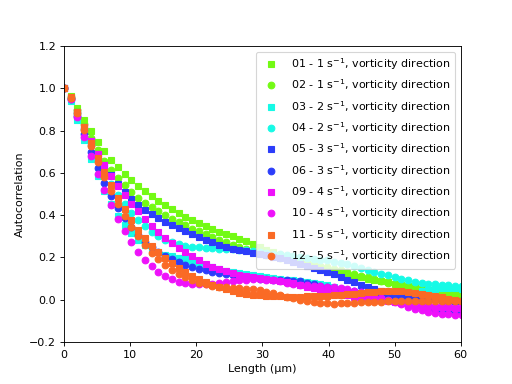

In [83]:
##################################
# Plots of the autocorr          #
#  VORTICITY DIRECTION           #
##################################
#color1 = '#27A4F2'
#color2 = '#186899'

colors_vort = ['#73FA14', '#16FAE6', '#2C3DFA', '#EE11FA', '#FA6A25']


plt.figure()


#Create plots of the autocorrleation
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr0'], 's', color=colors_vort[0], 
         label='01 - 1 s$^{-1}$, vorticity direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr0'], 'o', color=colors_vort[0], 
         label='02 - 1 s$^{-1}$, vorticity direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr0'], 's', color=colors_vort[1], 
         label='03 - 2 s$^{-1}$, vorticity direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr0'], 'o', color=colors_vort[1], 
         label='04 - 2 s$^{-1}$, vorticity direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr0'], 's', color=colors_vort[2], 
         label='05 - 3 s$^{-1}$, vorticity direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr0'], 'o', color=colors_vort[2], 
         label='06 - 3 s$^{-1}$, vorticity direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr0'], 's', color=colors_vort[3], 
         label='09 - 4 s$^{-1}$, vorticity direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr0'], 'o', color=colors_vort[3], 
         label='10 - 4 s$^{-1}$, vorticity direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr0'], 's', color=colors_vort[4], 
         label='11 - 5 s$^{-1}$, vorticity direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr0']))*pixel_size, 
         all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr0'], 'o', color=colors_vort[4], 
         label='12 - 5 s$^{-1}$, vorticity direction')

#print("Where the correlation goes to 50% for axis 0: ", find_where_corr_at_half(avg_acorr0, val=0.5)*pixel_size)
#print("Where the correlation goes to 70% for axis 1: ", find_where_corr_at_half(avg_acorr1, val=0.7)*pixel_size)
#plt.title("Showing frame number %i" % frame_to_show)
plt.xlabel("Length (µm)")
plt.ylabel("Autocorrelation")
plt.xlim(0,60)
plt.ylim(-0.2,1.2)
plt.legend(loc=1)
#plt.savefig("AutoCorr_8-10_1s-1_and_5s-1.svg")

#Create figure for 2D autocorrelation
#plt.figure()
#plt.matshow(corr2d, fignum=0, cmap='gray')

<IPython.core.display.Javascript object>


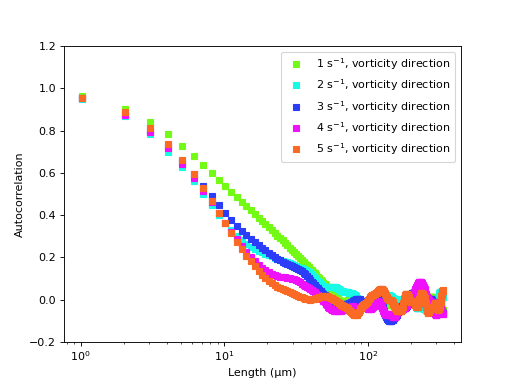

In [96]:
##################################
# Plots of the autocorr          #
#  VORTICITY DIRECTION           #
##################################
#color1 = '#27A4F2'
#color2 = '#186899'

colors_vort = ['#73FA14', '#16FAE6', '#2C3DFA', '#EE11FA', '#FA6A25']


plt.figure()


#Create plots of the autocorrleation
avg_1 = 0.5*(all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr0'] + all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr0'])
plt.semilogx(np.arange(len(all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr0']))*pixel_size, 
         avg_1, 's', color=colors_vort[0], 
         label='1 s$^{-1}$, vorticity direction')

avg_2 = 0.5*(all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr0'] + all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr0'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr0']))*pixel_size, 
         avg_2, 's', color=colors_vort[1], 
         label='2 s$^{-1}$, vorticity direction')

avg_3 = 0.5*(all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr0'] + all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr0'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr0']))*pixel_size, 
         avg_3, 's', color=colors_vort[2], 
         label='3 s$^{-1}$, vorticity direction')

avg_4 = 0.5*(all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr0'] + all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr0'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr0']))*pixel_size, 
         avg_4, 's', color=colors_vort[3], 
         label='4 s$^{-1}$, vorticity direction')

avg_5 = 0.5*(all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr0'] + all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr0'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr0']))*pixel_size, 
         avg_5, 's', color=colors_vort[4], 
         label='5 s$^{-1}$, vorticity direction')


#print("Where the correlation goes to 50% for axis 0: ", find_where_corr_at_half(avg_acorr0, val=0.5)*pixel_size)
#print("Where the correlation goes to 70% for axis 1: ", find_where_corr_at_half(avg_acorr1, val=0.7)*pixel_size)
#plt.title("Showing frame number %i" % frame_to_show)
plt.xlabel("Length (µm)")
plt.ylabel("Autocorrelation")
#plt.xlim(0,60)
plt.ylim(-0.2,1.2)
plt.legend(loc=1)
#plt.savefig("AutoCorr_8-10_1s-1_and_5s-1.svg")

#Create figure for 2D autocorrelation
#plt.figure()
#plt.matshow(corr2d, fignum=0, cmap='gray')

<IPython.core.display.Javascript object>


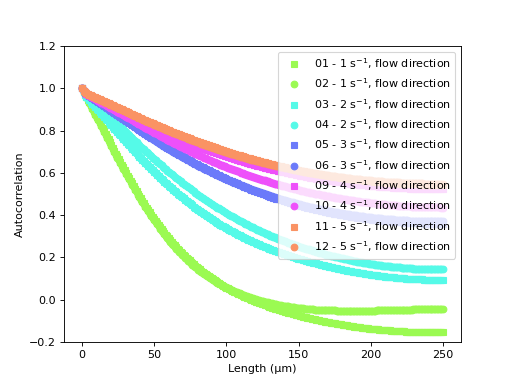

In [87]:
##################################
# Plots of the autocorr          #
#  FLOW DIRECTION                #
##################################
#color1 = '#27A4F2'
#color2 = '#186899'

colors_flow = ['#9BFA52', '#55FAE8', '#6B7AFA', '#EE50FA', '#FA9364']


plt.figure()


#Create plots of the autocorrleation
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr1'], 's', color=colors_flow[0], 
         label='01 - 1 s$^{-1}$, flow direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr1'], 'o', color=colors_flow[0], 
         label='02 - 1 s$^{-1}$, flow direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr1'], 's', color=colors_flow[1], 
         label='03 - 2 s$^{-1}$, flow direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr1'], 'o', color=colors_flow[1], 
         label='04 - 2 s$^{-1}$, flow direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr1'], 's', color=colors_flow[2], 
         label='05 - 3 s$^{-1}$, flow direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr1'], 'o', color=colors_flow[2], 
         label='06 - 3 s$^{-1}$, flow direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr1'], 's', color=colors_flow[3], 
         label='09 - 4 s$^{-1}$, flow direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr1'], 'o', color=colors_flow[3], 
         label='10 - 4 s$^{-1}$, flow direction')

plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr1'], 's', color=colors_flow[4], 
         label='11 - 5 s$^{-1}$, flow direction')
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr1']))*pixel_size, 
         all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr1'], 'o', color=colors_flow[4], 
         label='12 - 5 s$^{-1}$, flow direction')

#print("Where the correlation goes to 50% for axis 0: ", find_where_corr_at_half(avg_acorr0, val=0.5)*pixel_size)
#print("Where the correlation goes to 70% for axis 1: ", find_where_corr_at_half(avg_acorr1, val=0.7)*pixel_size)
#plt.title("Showing frame number %i" % frame_to_show)
plt.xlabel("Length (µm)")
plt.ylabel("Autocorrelation")
#plt.xlim(0,60)
plt.ylim(-0.2,1.2)
plt.legend(loc=1)
#plt.savefig("AutoCorr_8-10_1s-1_and_5s-1.svg")

#Create figure for 2D autocorrelation
#plt.figure()
#plt.matshow(corr2d, fignum=0, cmap='gray')

<IPython.core.display.Javascript object>


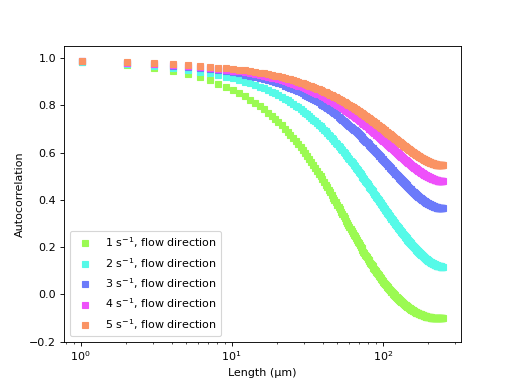

In [99]:
##################################
# Plots of the autocorr          #
#  FLOW DIRECTION                #
##################################
#color1 = '#27A4F2'
#color2 = '#186899'

colors_flow = ['#9BFA52', '#55FAE8', '#6B7AFA', '#EE50FA', '#FA9364']


plt.figure()


#Create plots of the autocorrleation
avg_1 = 0.5*(all_data['2021-08-10 - 04 - 02 - 1Hz']['avg_acorr1'] + all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr1'])
plt.semilogx(np.arange(len(all_data['2021-08-10 - 04 - 01 - 1Hz']['avg_acorr1']))*pixel_size, 
         avg_1, 's', color=colors_flow[0], 
         label='1 s$^{-1}$, flow direction')

avg_2 = 0.5*(all_data['2021-08-10 - 04 - 04 - 2Hz']['avg_acorr1'] + all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr1'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 03 - 2Hz']['avg_acorr1']))*pixel_size, 
         avg_2, 's', color=colors_flow[1], 
         label='2 s$^{-1}$, flow direction')

avg_3 = 0.5*(all_data['2021-08-10 - 04 - 06 - 3Hz']['avg_acorr1'] + all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr1'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 05 - 3Hz']['avg_acorr1']))*pixel_size, 
         avg_3, 's', color=colors_flow[2], 
         label='3 s$^{-1}$, flow direction')

avg_4 = 0.5*(all_data['2021-08-10 - 04 - 10 - 4Hz']['avg_acorr1'] + all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr1'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 09 - 4Hz']['avg_acorr1']))*pixel_size, 
         avg_4, 's', color=colors_flow[3], 
         label='4 s$^{-1}$, flow direction')

avg_5 = 0.5*(all_data['2021-08-10 - 04 - 12 - 5Hz']['avg_acorr1'] + all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr1'])
plt.plot(np.arange(len(all_data['2021-08-10 - 04 - 11 - 5Hz']['avg_acorr1']))*pixel_size, 
         avg_5, 's', color=colors_flow[4], 
         label='5 s$^{-1}$, flow direction')


#print("Where the correlation goes to 50% for axis 0: ", find_where_corr_at_half(avg_acorr0, val=0.5)*pixel_size)
#print("Where the correlation goes to 70% for axis 1: ", find_where_corr_at_half(avg_acorr1, val=0.7)*pixel_size)
#plt.title("Showing frame number %i" % frame_to_show)
plt.xlabel("Length (µm)")
plt.ylabel("Autocorrelation")
#plt.xlim(0,60)
plt.ylim(-0.2,1.05)
plt.legend(loc=0)
#plt.savefig("AutoCorr_8-10_1s-1_and_5s-1.svg")

#Create figure for 2D autocorrelation
#plt.figure()
#plt.matshow(corr2d, fignum=0, cmap='gray')

In [97]:
f = open(drive_letter+":\\Dennis Terwilliger\\Data\\2021-08-10\\Autocorr_lengths_Folder04-10x_300framespermovie.p",'wb')
pickle.dump(all_data, f)
f.close()

<IPython.core.display.Javascript object>


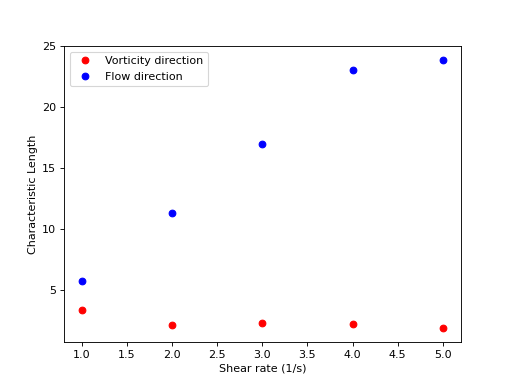

<IPython.core.display.Javascript object>


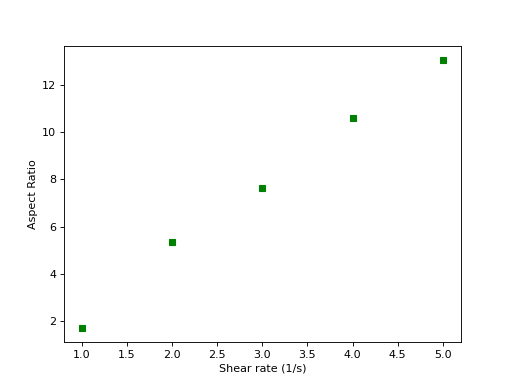

Text(0, 0.5, 'Aspect Ratio')

In [17]:
vort = np.array([3.33, 2.1, 2.23, 2.17, 1.83])
flow = np.array([5.68, 11.28, 16.98, 23.0,  23.90])
shear_rates = np.array([1,2,3,4,5])
plt.figure()
plt.plot(shear_rates, vort, 'ro', label="Vorticity direction")
plt.plot(shear_rates, flow, 'bo', label="Flow direction")
plt.xlabel("Shear rate (1/s)")
plt.ylabel("Characteristic Length")
plt.legend()

plt.figure()
plt.plot(shear_rates, flow/vort, 'gs')
plt.xlabel("Shear rate (1/s)")
plt.ylabel("Aspect Ratio")

In [56]:
def autocorr_decay_value(images, background, framenum, decay_fraction=0.7):
    filtered_image = 1.0 * images[framenum] - background
    corr2d = autocorrelation_2D(filtered_image)

    acorr0_from2d = corr2d[int(filtered_image.shape[0]/2),int(filtered_image.shape[1]/2):]
    acorr1_from2d = corr2d[int(filtered_image.shape[0]/2):,int(filtered_image.shape[1]/2)]
    where_autocorr_decay_0 = find_where_corr_at_half(acorr0_from2d, val=decay_fraction)
    where_autocorr_decay_1 = find_where_corr_at_half(acorr1_from2d, val=decay_fraction)
    return (where_autocorr_decay_0, where_autocorr_decay_1)

In [81]:
all_horizontal_lengthscales = np.zeros((im.shape[0]))
all_vertical_lengthscales = np.zeros_like(all_horizontal_lengthscales)
for i in range(0,im.shape[0]):
    all_horizontal_lengthscales[i], all_vertical_lengthscales[i] = autocorr_decay_value(images, background, i, decay_fraction=0.7)
    
all_data['2021-08-10 - 03 - 01 - 1Hz']['all_horizontal_lengthscales'] = all_horizontal_lengthscales
all_data['2021-08-10 - 03 - 01 - 1Hz']['all_vertical_lengthscales'] = all_vertical_lengthscales
all_data['2021-08-10 - 03 - 01 - 1Hz']['mean_horizontal_lengthscale'] = all_horizontal_lengthscales.mean()
all_data['2021-08-10 - 03 - 01 - 1Hz']['mean_vertical_lengthscale'] = all_vertical_lengthscales.mean()

<IPython.core.display.Javascript object>


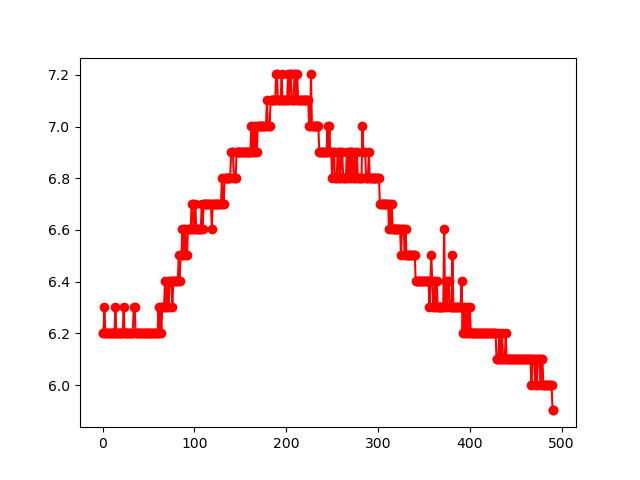

<IPython.core.display.Javascript object>


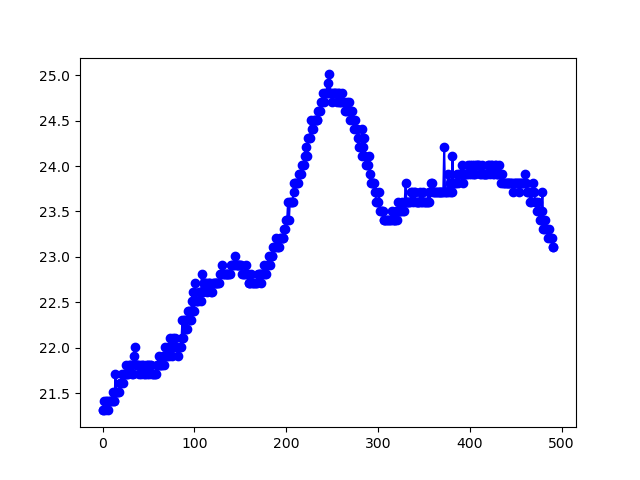

In [76]:
plt.figure()
plt.plot(all_horizontal_lengthscales,'-ro')
plt.figure()
plt.plot(all_vertical_lengthscales,'-bo')

<IPython.core.display.Javascript object>


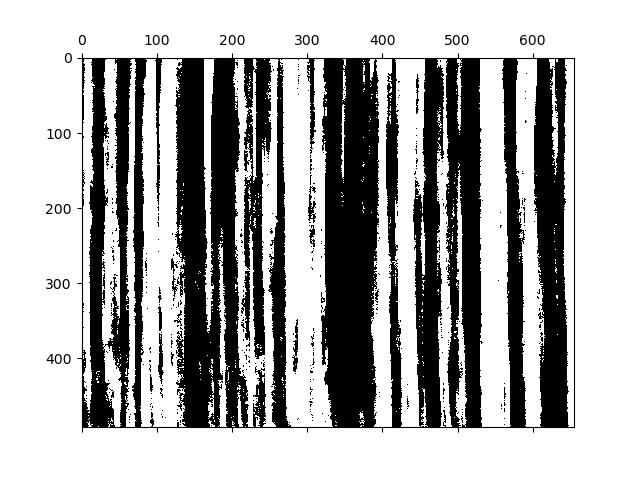

<IPython.core.display.Javascript object>


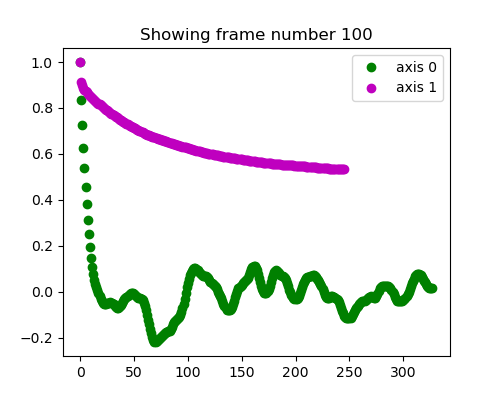

Where the correlation goes to 10% for axis 0:  107.93290637389448
Where the correlation goes to 10% for axis 1:  243.9991866612444


<ipython-input-19-0d19a49f7c3d>:35: RuntimeWarning: invalid value encountered in true_divide
  data = data / temp


In [61]:
#Convert image to binary (black and white)
block_size = 251
local_threshold = filters.threshold_local(filtered_image, block_size, offset=10)
binary_image = filtered_image > local_threshold

#Creates figure and shows region to analyze
plt.figure()
plt.matshow(binary_image, fignum=0, cmap='gray') #shows image

corr2d = autocorrelation_2D(binary_image)
plt.figure(figsize=(5,4))
acorr_0 = autocorrelation_1D(binary_image,0)
acorr_1 = autocorrelation_1D(binary_image,1)
#plt.plot(acorr_0,'bo',label='axis 0')
#plt.plot(acorr_1,'ro',label='axis 1')
acorr0_from2d = corr2d[int(im.shape[0]/2),int(im.shape[1]/2):]
acorr1_from2d = corr2d[int(im.shape[0]/2):,int(im.shape[1]/2)]
plt.plot(acorr0_from2d, 'go', label='axis 0')
plt.plot(acorr1_from2d, 'mo', label='axis 1')
print("Where the correlation goes to 10% for axis 0: ", find_where_corr_at_half(acorr0_from2d, val=0.1))
print("Where the correlation goes to 10% for axis 1: ", find_where_corr_at_half(acorr1_from2d, val=0.1))
plt.title("Showing frame number %i" % frame_to_show)
plt.legend(loc=0)